## TP 5 : " Stokes Flow ".

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Le but de ce 5ème TP est de résoudre l'écoulement de Stokes dans une cavité carrée à couvercle en utilisant la formulation de la fonction de vorticité-flux introduite dans l'introduction de ce challenge.

Pour se faire, nous utiliserons quelques méthode de résolution numérique tel que la méthode de Jacobi, sa version compilée, etc. qui nous permettrons en outre, de nous rendre compte de l'efficacité de ces dernières tout comme nous avons put nous en rendre compte tout au long des notebooks de ce 5ème module. 

Finalement, nous nous intéresserons à la convergences de ces méthodes et à leur comportement qui, comme nous le verrons, est intimement lié à la physique du problème.

---

##### 1. Rappels et développement théorique.
---

L'écoulement de Stokes (également appelé "écoulement glissant) et son hypothèse nous offres un excellent moyen de simplifier les équations de Navier-Stokes régissant le mouvement d'un fluide dans l'approximation d'un milieu continu.

Notons tout de même que cette hypothèse consistant à supposer que l'on ai un nombre de reynolds $Re^{1}$ proche de 0 n'est pas incontournable pour résoudre le problème "Stokes flow". En effet, ce dernier peut-être résolu (par des méthodes qui ne seront pas abordées ici) pour des nombres de Reynolds de l'ordre de 100, 400 voir 1000.


---
###### [1] Le nombre de Reynolds $Re$ est donné par le rapport du terme associé à un transport convectif de quantité de mouvement $(\vec{v} . \vec{\nabla}) \vec{v}$  et du terme de transport par diffusion visqueuse $\nu \nabla ^2 \vec{v}$ des équations de Navier-Stokes :  $Re = \frac{vL}{ \nu }$ où $\nu$ est donc la viscosité du fluide, $v$ une vitesse caractéristique de l'écoulement et $L$ est une longueur caractéristique.
---

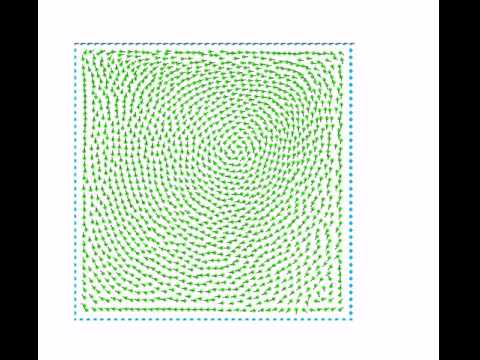

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('VFwK2BsWcOc')

###### Figure 1. Video du problème Stokes flow (Lid Driven Cavity problem) résolu pour une valeur du nombre de Reynolds de $Re = 400$ par la méthode SPH (Smoothed Particle Hydrodynamics) détaillé dans le lien [2] fournit dans les sources.

---

A présent, redérivons succintement les fonctions de vorticité-flux comme nous l'avons vu dans l'introduction théorique de ce TP. 

Débutons pour cela par les équations de Navier-Stokes pour un écoulement incompressible

\begin{equation}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u
\end{equation}

et procédons à une mise à l'échelle de cette équation,

\begin{equation}→
Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*
\end{equation}

L'équation de transport de vorticité pour l'écoulement de Stokes est alors obtenue en utilisant l'hypothèse Stokes d'un nombre de Reynolds proche de 0 permettant de se débarasser des termes non-linéaire tout en procédant au remaniement de certain termes. Nous obtenons donc

\begin{equation}
\nabla ^2 \omega = 0
\end{equation}

$$
{}
$$

L'équation pour la fonction de courant 

$$
\begin{array}{}
\nabla ^2 \psi = -\omega  \hspace{2.0cm} (* *)
\end{array}
$$

est quant à elle obtenue par une simple manipulation des relations qui définissent la fonction de courant, à savoir :

\begin{equation}
u = \frac{\partial \psi}{\partial y} \hspace{1.0cm} \text{   et   } \hspace{1.0cm} v = - \frac{\partial \psi}{\partial x}
\end{equation}

 et de la vorticité exprimée en 2d par :
 
\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

Nous obtenons donc le système suivant de deux équations couplées qui nous permet de décrire l'écoulement du fluide dans notre problème

$$
\left\{
\begin{array}{}
\Delta \omega = 0 \hspace{2.5cm} (*)\\
\Delta \psi = - \omega \hspace{2.0cm} (* *)
\end{array}
\right.
$$

Passons maintenant à la discrétisation de ces équations.

---

##### 2. Discrétisation des équations courant-vorticité et des conditions aux bords.

---

#### 2.1 Discrétisation des équations :
---

Nous disposons donc le système d'équations couplés suivant à discrétiser:

$$
\left\{
\begin{array}{}
\Delta \omega = 0    \hspace{3.5cm}  (*)\\
\Delta \psi = - \omega \hspace{3.0cm}  (* *)
\end{array}
\right.
$$

L'équation $(*)$ n'est rien d'autre qu'une équation de Laplace tandis que l'équation $(* *)$ correspond à une équation de Poisson dont le terme de source n'est autre que la fonction de vorticité $\omega$.
Par conséquent, la discrétisation de nos équations sera très similaire à ce que nous avons put voir dans les notebook de ce 5ème module.
Commençons par l'équation $(*)$.

$$
{}
$$

* Discrétisation de l'équation $(*)$:

À 2 dimension, notre équation est donnée par :

\begin{equation}
\hspace{1.0cm} \frac{\partial ^2 \omega}{\partial x^2} + \frac{\partial ^2 \omega}{\partial y^2} = 0
\end{equation}

Discrétisons cette dernière au moyen d'une différence centrale comme suit :

\begin{equation}
→ \frac{\omega^{k}_{i+1, j}  - 2\omega^{k}_{i,j}  + \omega^{k}_{i-1,j} }{\Delta x^2} + \frac{\omega^{k}_{i,j+1}  - 2\omega^{k}_{i,j}  + \omega^{k}_{i, j-1} }{\Delta y^2} = 0
\end{equation}

qui, lorsque $\Delta x^2 = \Delta y^2$ nous donne :

\begin{equation}
→ \omega^{k}_{i+1, j}   + \omega^{k}_{i-1,j} + \omega^{k}_{i,j+1}  + \omega^{k}_{i, j-1}- 4 \omega^{k}_{i,j} = 0
\end{equation}

ou encore, en procédant à quelques réarrangements,

\begin{equation}
→ \omega^{k}_{i,j} = \frac{1}{4} \left(\omega^{k}_{i,j-1} + \omega^k_{i,j+1} + \omega^{k}_{i-1,j} + \omega^k_{i+1,j} \right)
\end{equation}

$$
{}
$$

* Discrétisation de l'équation $(* *)$:

À 2 dimension, notre équation est donnée par :

\begin{equation}
\frac{\partial ^2 \psi}{\partial x^2} + \frac{\partial ^2 \psi}{\partial y^2} = - \omega
\end{equation}

Discrétisons cette équation de Poisson comme on l'a vu dans le second notebook de ce module, e.g, au moyen d'une diférence centrale pour les dérivées et avec $- \omega$ comme terme de source :


\begin{equation}
→ \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta y^2} = -  \omega_{i,j}^{k}
\end{equation}

Or nous avons ici que $\Delta x^2 = \Delta y^2$

\begin{equation}
→ \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta x^2} = -  \omega_{i,j}^{k}
\end{equation}

On fait alors passer le delta dans le membre de droite,

\begin{equation}
→ \psi_{i+1,j}^{k} - 4\psi_{i,j}^{k}+ \psi_{i-1,j}^{k} + \psi_{i,j+1}^{k} + \psi_{i,j-1}^{k} = - \omega_{i,j}^{k} \Delta x^2
\end{equation}

et on isole finalement $\psi_{i,j}^{k}$,

$$
\begin{array}{}
→ \psi_{i,j}^{k} = \frac{1}{4} \left( \psi_{i+1,j}^{k} + \psi_{i-1,j}^{k} + \psi_{i,j+1}^{k} + \psi_{i,j-1}^{k} + \omega_{i,j}^{k} \Delta x^2 \right)
\end{array}
$$

---
#### 2.2 Discrétisation des conditions aux bords :
---

Pour rappel, nous disposons des conditions aux bords (CB) pour la fonction de courant $\psi$ suivantes :

$$
\left\{
\begin{array}{}
\frac{\partial \psi}{\partial x} = 0 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord gauche)}\\
\frac{\partial \psi}{\partial x} = 0 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord droit)}\\
\frac{\partial \psi}{\partial y} = 0 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord inférieur)}\\
\frac{\partial \psi}{\partial y} = 1 \hspace{0.5cm} \text{ et } \hspace{0.5cm} \psi = 0 \hspace{1.0cm} \text{(bord supérieur)}
\end{array}
\right.
$$

$$
{}
$$

Nous désirons alors discrétiser les conditions aux bords pour la fonctions de vorticité $\omega$ en tenant en compte les CB pour $\psi$.

Débutons par le bord supérieur. 

Pour cela, développons quelque peu le raisonnement aborder dans l'introduction théorique de ce TP, en commençant par discrétiser $\omega$ au moyen d'un différence centrale du second ordre:

\begin{equation}
→ \omega_j = - \left(\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2}\right)
\end{equation}

Nous allons ensuite utiliser une discrétisation du 3e ordre le long du bord supérieur. Cette discrétisation s'opère en prenant 3 points proches du bord comme illustré sur la figure 2 ci-dessous:

---

![Image](./figures/bord_sup.png)

---
###### Figure 2. Esquisse des points, sélectionnés de part et d'autre du bord supérieur du domaine, utiles à la discrétisation de ce dernier.

$$
{}
$$

La fonction de courant $\psi$ est alors développée en série de puissance en ces 3 points :

$$
\begin{array}{}
\psi (y+ \Delta y) = \psi (y) + \frac{\partial \psi}{\partial y} \Delta y+ \frac{1}{2} \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 + \frac{1}{6} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.7cm} (i)\\
\psi (y- \Delta y) = \psi (y) - \frac{\partial \psi}{\partial y} \Delta y+ \frac{1}{2} \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 - \frac{1}{6} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.7cm} (ii)\\
\psi (y- 2 \Delta y) = \psi (y) - 2 \frac{\partial \psi}{\partial y} \Delta y+ 2 \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 - \frac{4}{3} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.1cm} (iii)\\
\end{array}
$$

$$
{}
$$


Nous multiplions ensuite (i) par a, (ii) par b et (iii) par c et nous sommons les termes en les dérivées premières, seconde et troisième en imposant que ces trois sommes valent, respectivement 1, 0 et 0 et ce afin de ne conserver au final que les dérivées premières.

Nous disposons donc du système suivant à résoudre :

$$
\left\{
\begin{array}{}
a - b - 2c = 1\\
\frac{1}{2}a + \frac{1}{2}b + 2c =0\\
\frac{1}{6}a - \frac{1}{6}b - \frac{4}{3} c =0
\end{array}
\right.
$$

La résolution de ce système nous fournit alors trois coefficients qui lorsque l'on somme (i), (ii) et (iii) annule comme souhaité les termes en les dérivées seconde et troisième. Nous obtenons ainsi 

\begin{equation}
\hspace{-1.5cm}(i) + (ii) + (iii) : \hspace{0.5cm}\frac{1}{3}\psi_{j+1} - \psi_{j-1} + \frac{1}{6}\psi_{j-2} = - \frac{1}{2}\psi_{j} + \left. \frac{\partial \psi}{\partial y}\right|_j \Delta y
\end{equation}

dès lors

\begin{equation}
→ \left.\frac{\partial \psi}{\partial y}\right|_j = \frac{2\psi_{j+1} - 6\psi_{j-1} + \psi_{j-2} + 3\psi_j}{6 \Delta y}
\end{equation}

Ce qui correspond bien à l'expression donnée dans la partie théorique de l'énoncé de ce TP et où 

$$
\begin{array}{}
\left.\frac{\partial \psi}{\partial y}\right|_j = u_j = 1
\end{array}
$$

$$
{}
$$

Isolons maintenant $\psi_{j+1}$ (la valeur de $\psi$ hors du domaine) pour obtenir ce dernier en fonction de points du domaine uniquement:

\begin{equation}
\psi_{j+1} = \frac{6\Delta y + 6 \psi_{j-1} - \psi_{j-2} - 3\psi_j}{2}
\end{equation}

Injectons ensuite ceci dans l'expression discrétisée de $\omega$ pour finalement obtenir:

$$
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3}{\Delta y} + \mathcal{O}(\Delta y^2)  \hspace{1.5cm} \text{(bord supérieur)}
\end{array}
$$

$$
{}
$$

La conditions au bord du bord supérieur étant fait, nous pouvons attaquer les 3 autres bords. Brièvement, en prenant les points repris sur la figure 3, 

---

![Image](./figures/bords.png)

---
###### Figure 3. Esquisse des points sélectionnés de part et d'autre des bords inférieur, gauche et droit du domaine, utiles à la discrétisation de ce dernier.

$$
{}
$$

et en procédant similairement à ce qui a été fait pour le bord supérieur tout en veillant à isoler le point hors du domaine qui diffère d'un bord à l'autre tout en appliquant la condition au bord suivante 

$$
\begin{array}{}
\left.\frac{\partial \psi}{\partial y}\right|_j = 0
\end{array}
$$

Nous obtenons finalement, en se souvenant que dans notre cas $\Delta x^2 = \Delta y^2$ :

$$
\left\{
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j+1} - \psi_{i, j+2}) + \frac{3}{\Delta y} + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord inférieur)}\\
\omega_{i,j} = -\frac{1}{2 \Delta x^2} (8\psi_{i-1, j} - \psi_{i-2, j}) - \frac{3}{\Delta x} + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord droit)}\\
\omega_{i,j} = -\frac{1}{2 \Delta x^2} (8\psi_{i+1, j} - \psi_{i+2, j}) + \frac{3}{\Delta x} + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord gauche)}\\
\end{array}
\right.
$$

---

##### 3. Résolution du Problème.
---

Maintenant que nous disposons de tout les outils théoriques utiles, nous pouvons passer à la résolution de notre problème qui, comme annoncé dans l'introduction, sera réalisé par diverse méthodes dans le but de comparer l'efficacité de ces dernières.

La première d'entre-elle n'est autre que la méthode de Jacobi. Elle sera suivie d'une version compilée d'elle même, de la méthode de Gauss-Seidel et finalement de la méthode de SOR (Successive Over-Relaxation) qui se repose toutes sur la méthode qui la précède (en suivant l'ordre d'énonciation).

---

#### 3.1 Méthode de Jacobi.
---

Commençons par importer les librairies qui nous seront utiles pour la suite.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous définissons ensuite une fonction pour la norme L1 d'après l'algorithme qui nous a été donné.

Une fois implémentée, cette dernière va donc nous permettre de définir un critère d'arrêt basé sur l'intervalle entre deux solutions successives égale à la précision souhaitée soit $10^{-6}$ dans ce cas-ci.

En outre, cette norme nous permettra d'étudier la rapidité de convergence des diverses méthode qui seront abordées.

Finalement, notons que l'utilisation de la norme L1 plutôt qu'une norme L2 (voir une norme infinie) comme nous l'avons fait tout au long des notebooks de ce module est un simple choix.

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    #normal = norm/numpy.sum(old*old)
    return norm

Nous allons maintenant redéfinir quelque peu la fonction Jacobi que nous avons vu dans le 1er notebook en tenant compte de notre problème, ses conditions aux bords et ses conditions intiales.

Le premier changement à opérer consiste à modifier la condition d'arrêt de la boucle while opérant l'algorithme de la méthode de Jacobi. En effet, la fonction Jacobi était initialement conçue pour résoudre numériquement une équation de Laplace or, comme nous l'avons mentionné précédemment, nous disposons ici d'un système d'équation couplées constitué d'une équation de Poisson pour $\psi$ et d'une équation de Laplace pour $\omega$.

Notre nouveau critère d'arrêt doit donc se basé sur une norme calculée d'après les valeurs de $\omega$ et sur une seconde norme calculée d'après les valeurs de $\psi$. Les deux normes devant avoir une valeur plus petite que la précision souhaité pour satisfaire totalement à notre nouveau critère d'arrêt.  

Le deuxième changement se situe au sein même de la boucle while et consiste en l'implémentation de la discrétisation des équations $(*)$ et $(* *)$ ainsi que des conditions au bords pour $\omega$.

Notons enfin que les conditions aux bords seront calculées juste avant l'implémentation de l'équation de poisson étant donné que $\omega$ n'est autre que le terme de source de cette dernière. Il convient donc de mettre à jour les valeurs de  $\omega$ avant de les utilisées pour le calcul de $\psi$.

Nous avons donc la fonction de Jacobi suivante.

NB: La fonction *jacobi* nous retournera les 4 informations utiles, pour répondre aux questions qui nous ont été posées, à savoir: 

- la valeur de $\psi$ pour tout notre domaine à la dernière itération
- la valeur de $\omega$ pour tout notre domaine à la dernière itération
- le nombre d'itération nécessaire pour parvenir à satisfaire notre critère d'arrêt
- le tableau de la norme L1 de psi pour l'étude de la convergence de la méthode

In [4]:
def jacobi(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi

    return psi, om, iterations, l1_conv

Enfin, nous définissons une dernière fonction qui n'est autre que la fonction " *plot_3D* " vue dès le premier notebook de ce module et qui va nous permettre de mieux visualiser la solution de notre problème.

In [5]:
def plot_3D(x, y, p):
    '''Créer un graphique en 3D avec les limites et l'angle de vue approprié

    Paramètres:
    ----------
    x: Tableau de float ("nombre à virgule flottante")
        Coordonnées nodales en x
    y: Tableau de float ("nombre à virgule flottante")
        Coordonnées nodales en x
    psi: Tableau à 2D de float
        Distribution de p calculée
    
    '''
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

Maintenant que nous disposons de tout les outils utiles à la résolution de notre problème, il ne nous reste qu'a initialiser nos paramètres et conditions initiales ainsi que les conditions aux bords pour la configuration initiale.

In [6]:
#Initialisation des paramètres initiaux
nx = 41            # Nombre de point discrétisant l'axe x
ny = 41            # Nombre de point discrétisant l'axe y
l = 1.             # Limite en x de notre domaine (cavité)
h = 1.             # Limite en y de notre domaine (cavité)
d = l/(nx-1)       # delta
l1_target = 1e-6   # Critère d'arrêt

# Conditions initiales
psi0 = numpy.zeros((ny,nx))
om0  = numpy.zeros((ny,nx))

# Bord supérieur
om0[-1,:] = -0.5/(d**2)*(8*psi0[-2,:]-psi0[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om0[0,:] = -0.5/(d**2)*(8*psi0[1,:]-psi0[2,:])

# Bord droit
om0[:,-1] = -0.5/(d**2)*(8*psi0[:,-2]-psi0[:,-3])
        
# Bord gauche
om0[:,0] = -0.5/(d**2)*(8*psi0[:,1]-psi0[:,2])


# Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

Vérifions que nos conditions initiales et conditions aux bords aient correctements été implémentées à l'aide d'une figure à 3D et donc à l'aide de notre fonction "*plot _3D*".

Pour $\psi$ nous avons ainsi :

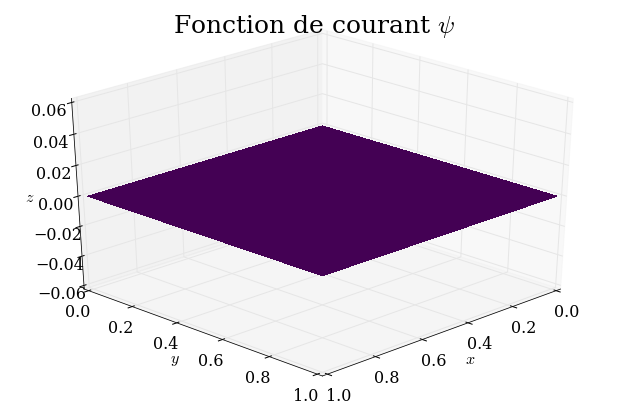

In [7]:
plot_3D(x,y,psi0)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)

Ce qui est conforme à nos attentes.
Regardons alors la fonction de vorticité $\omega$ :

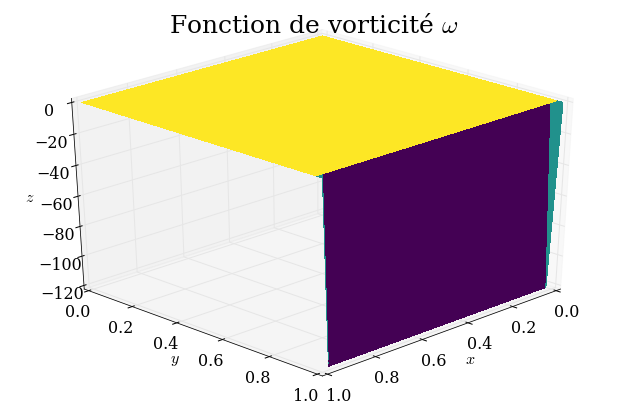

In [8]:
plot_3D(x,y,om0)
pyplot.title("Fonction de vorticité $\omega$", fontsize = 25)

Ce qui est à nouveau conforme à nos attentes. En effet prenons, par exemple, la valeur de $\omega_z$ minimale (la composante z de $\omega$) correspondant au niveau du bord inférieur.

Etant donné que $\psi$ est initialement nul nous aurons que 

$$
\begin{array}{}
\omega = -\frac{3}{d}
\end{array}
$$

ce qui nous donne d'après l'expression de d : 

$$
\begin{array}{}
d = \frac{l}{nx-1} = 0.025\hspace{2.0cm} \text{avec } l = 1 \text{ et }  nx =41
\end{array}
$$

→ $\omega = -120$ ,ce qui est bien ce que l'on observe.

Nos conditions initiales étant correctement été implémentée nous pouvons désormais faire appel à notre fonction " *jacobi* " pour résoudre notre problème.

In [9]:
psi, om, iterations, l1_conv = jacobi(om0.copy(), psi0.copy(), d, l1_target)

print("\n→ La méthode de Jacobi prend {} itérations à la tolérance {}".format(iterations, l1_target))


→ La méthode de Jacobi prend 2771 itérations à la tolérance 1e-06


Nous voyons dors et déjà via cette "impression" du nombre d'itération, que l'algorithme que nous venons d'implémenter fonctionne (cela n'implique pas pour autant que le résultat soit correcte). 

NB: Le nombre d'itération que nous venons de ressortir nous sera utile par la suite, lorsque nous comparerons l'efficacité des diverses méthodes que nous testerons.

Avant de calculer les diverses données nécessaires pour vérifier la bonne implémentation de la méthode Jacobi vérifions au moyen d'une figure à 2D que notre situation finale correspond bien à celle figurant sur le site :

http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/info

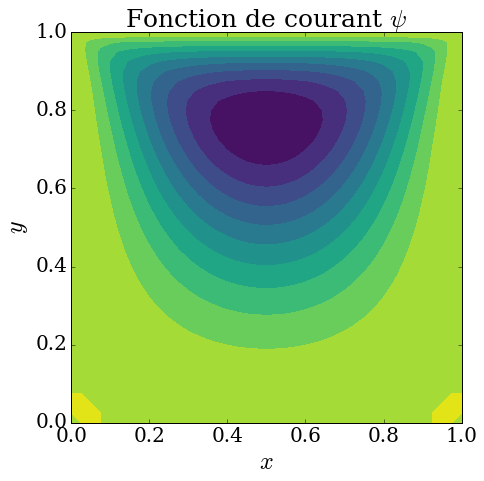

In [10]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psi,10,cmap=cm.viridis)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)
pyplot.xlabel('$x$', fontsize=24)
pyplot.ylabel('$y$', fontsize=24)
pyplot.tick_params(axis='both',labelsize=20)

Ce qui correspond exactement à la figure représentée.

Que pouvons nous d'ores et déjà en déduire ? 

Physiquement, les contours de couleurs du graphique correspondent aux courbes de niveau de $\psi$, et donc aux lignes de courant. Par conséquent, on en déduit que le système tourne "par niveau" à des vitesses différentes. En d'autres termes, le système présente un écoulement tourbillonaire où chaque "niveau" présente une certaine vorticité.

Notons que cette notion de niveau est uniquement due au nombre de contour que nous avons demandé lors de la définition des contours dans la réalisation de la figure. Par conséquent, il est plus correcte de parler en terme de courbe que de niveau qui laisse suposé l'existence d'une couche dans laquelle les particule auraient la même vitesse.

Comme mentionné à l'instant, les particules de fluides se déplace donc le long d'isocourbes. Ainsi, toutes les particules se déplaçant sur une de ces isocourbe auront, par définition, la même vitesse, la même vorticité.

Notons enfin que les particules vont moins vite lorsque l'on s'approche du centre du vortex (région bleue foncée), ce que l'on peut également voir dans la vidéo d'introduction.

Ceci peut s'expliquer en réfléchissant en terme de flux. En effet, une fois le système relaxé, le flux$^2$ doit-être constant dans le temps d'une isocourbe à une autre. Par conséquent, la distance que doit parcourir une particule sur une isocourbe plus éloigné du centre du vortex sera plus grande que la distance que devra parcourir une même particule sur une isocourbe plus proche du centre du vortex. On comprend alors aisément par cette différence de distance à parcourir que la vitesse variera en fonction de la proximité du centre du vortex. Elle sera moins élevé pour une particule proche du centre de ce dernier que pour une particule plus excentré.

---

###### [2]
---

Ressortons maintenant les diverses informations demandées ce qui nous permettra de vérifier une ultime fois si notre problème à correctement été implémenté et résolu.

Commençons par ressortir les valeurs maximales (spécifié avec 4 décimales) de $| \psi |$ et $| \omega |$ à l'intérieur de la cavité pour la solution "relaxée".

Pour se faire, nous allons parcourir l'ensemble des valeurs de psi obtenues à la dernière itération à l'aide de 2 boucle for (une première pour l'indice de ligne et une seconde pour l'indice de colonne). Un bouléen nous permettra alors de comparer deux à deux les valeurs absolues de $\psi$ et de n'en garder que la valeur la plus élevée. Un second bouléen nous permettra alors de faire de même pour $|\omega|$.


Remarque : Comme à notre habitude, nous sortons l'ensemble des résultats avec le nombre de décimales désirées au moyen de la fonction proposé par numpy : $round()$.

In [11]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("\n→ La valeur maximale de la valeur absolue de la fonction de courant, \n psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité, \n omega, est :",round(om_max,4))


→ La valeur maximale de la valeur absolue de la fonction de courant, 
 psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité, 
 omega, est : 78.1927


Nous constatons agréablement que nos valeurs correspondent exactement aux valeurs renseignées par le site.
Enfin, ressortons les 6 nombres demandés via le code fournit dans l'énoncé du problème.

In [12]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



Ce qui correspond à nouveau aux valeurs (exactes) renseignées par le site.
Nous pouvons donc conclure par tout ce qui précède que le problème à correctement été résolu.

---

Ceci ne signifie toutefois pas que le travail que nous pouvons accomplir est terminé. En effet, comme annoncé dans le début de ce notebook nous allons tenté de résoudre ce problème via quelque unes des diverses méthode de résolution numérique que nous avons vu dans ce 5ème module.

La prochaine étape est donc de réalisé une version optimisée de la méthode de Jacobi en passant par des boucles et en compilant cette dernière. En outre, en plus d'accroître la vitesse de résolution de notre problème, cette version optimisée nous servira également de base pour la méthode de résolution suivante, la méthode de Gauss-Seidel.

---

#### 3.2 Méthode de Jacobi compilée.
---

Commençons par importer les librairies utiles pour la compilation.

In [13]:
import numba
from numba import jit

Nous allons maintenant définir deux nouvelles fonctions. 

La première d'entre elle réunira simplement nos conditions aux bords (CB) implémentées via des boucles. En effet, après avoir réaliser les diverses méthodes nécessitant l'emplois de boucles. Nous nous somme rendu compte que puisque les CB étaient identiques, l'emplois d'une fonction réunissant ces dernières pouvaient réduire sensiblement mais de manière assez agréable, le nombre de ligne de code facilitant ainsi la lecture des diverses fonctions utilisées.

In [14]:
@jit(nopython=True)   
def CB(psi, om):

    for i in range(1,nx-1):
        om[-1,i] = -0.5/(d**2)*(8*psi[-2,i]-psi[-3,i])-(3/d) # Bord supérieur
        om[0,i] = -0.5/(d**2)*(8*psi[1,i]-psi[2,i])          # Bord inférieur

    for j in range(1,ny-1):
        om[j,-1] = -0.5/(d**2)*(8*psi[j,-2]-psi[j,-3])       # Bord droit
        om[j,0] = -0.5/(d**2)*(8*psi[j,1]-psi[j,2])          # Bord gauche

    return om

La seconde fonction n'est rien d'autre que notre fonction Jacobi implémentée en terme de boucles à la manière de ce qui a été fait au cours du 3e notebook de ce module ("*05 03 Iterate This*").

Remarques :
* Comme nous savons que le nombre d'itération sera de 2771 (de part la résolution du problème via la méthode de Jacobi et de part ce qui à été dit dans le 3e notebook, e.g que le nombre d'itération ne change pas avec la compilation) pour cette version compilée de la méthode Jacobi nous restreignons la taille des tableaux contenant les valeurs de la norme L1 pour $\psi$ et $\omega$ à 3000.

* Les variables "iter_diff_psi" et "iter_diff_om" associées à la valeur des normes L1 de $\psi$ et $\omega$ respectivement, sont initialisées à "l1_target +1" afin que le critère d'arrêt ne soit pas satisfait dès la première itération.

In [15]:
@jit(nopython=True)
def jacobi_compil(om, omn, psi, psin, d, l1_target):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''


    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1  # On initialise l1_diff_psi comme étant plus grand que l1_target
    iter_diff_om = l1_target+1   # On initialise l1_diff_psi comme étant plus grand que l1_target
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (omn[j,i-1] + omn[j,i+1]\
                              + omn[j-1,i]  + omn[j+1,i])
                
        # On impose les conditions aux bords
        CB(psi, om)   
            
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psin[j,i-1] + psin[j,i+1]\
                                + psin[j-1,i]  + psin[j+1,i] + om[j,i] * d**2)
            
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

Vérifions à présent si cette "nouvelle" méthode à correctement été implementée. Commençons pour cela par appeler notre nouvelle fonction et vérifions si le nombre d'itération correspond à nos attentes.

In [16]:
psi, om, iterations, l1_diff_psiJ = jacobi_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

print("\n → La méthode de Jacobi compilée prend {} itérations à la \n tolérance: {}".format(iterations, l1_target))


 → La méthode de Jacobi compilée prend 2771 itérations à la 
 tolérance: 1e-06


Nous voyons ici que le nombre d'itération n'a pas changer ce qui est conforme à nos attentes.

Vérifions ensuite les diverses valeurs demandées en commencant par $| \psi |$ et $| \omega |$.

In [17]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("\n→ La valeur maximale de la valeur absolue de la fonction de courant, \n psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité, \n omega, est :",round(om_max,4),"\n")


→ La valeur maximale de la valeur absolue de la fonction de courant, 
 psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité, 
 omega, est : 78.1927 



Suivit par les 6 nombres.

In [18]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



À nouveau, nous constatons agréablement que les valeurs obtenues correspondent exactement aux valeurs renseignées par le site fournit plus haut.
Nous en concluons par conséquent que cette implémentation de la version compilée de la méthode de Jacobi à correctement été effectuée.

Remarque: les performances de chacune des méthodes sera analysé dans la section 4.

---

#### 3.3 Méthode Gauss-Seidel.
---

Comme annoncé, la méthode de Gauss-Seidel (G-S) est la 3ème méthode que nous allons utiliser et servira, comme la version de Jacobi compilée l'est pour G-S, de base à la 4ème et dernière méthode que nous aborderons de ce notebook, la méthode de SOR (Successive Over-Relaxation).

De plus, la méthode de G-S n'est rien d'autre qu'une version améliorée de Jacobi. En effet, pour rappel, l'idée principale de la méthode de G-S est l'utilisation de valeurs de la solution mises à jours dès qu'elles sont disponibles contrairement à Jacobi où l'on attend que les valeurs de la grille entière soient mises à jour pour calculé la solution.

Par conséquent, il suffit de modifier les valeurs de $\psi$ et $\omega$ qui sont prises pour calculé la solution a chaque étape à la manière dont cela a été fait dans le 3e notebook de ce module pour notre problème. 

Nous définissons ainsi la fonction suivante:

In [19]:
@jit(nopython=True)
def gauss_seidel(om, omn, psi, psin, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Gauss-Seidel avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psin
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''

    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1  # On initialise l1_diff_psi comme étant plus grand que l1_target
    iter_diff_om = l1_target+1   # On initialise l1_diff_psi comme étant plus grand que l1_target
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])
                
        # On impose les conditions aux bords
        CB(psi, om) 
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)

            
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

Nous appelons ensuite notre nouvelle fonction,

In [20]:
psi, om, iterations, l1_diff_psiGS = gauss_seidel(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

print("\n→ La méthode de Gauss-seidel prend {} itérations à la tolérance {}".format(iterations, l1_target))


→ La méthode de Gauss-seidel prend 1410 itérations à la tolérance 1e-06


Nous voyons ici que le nombre d'itération suit le comportement espéré, e.g à diminué par rapport à la méthode de Jacobi. Ceci nous donne d'ores et déjà un premier aperçu de l'efficacité de la méthode G-S que nous aborderons dans la section 4.

Vérifions maintenant les diverses données usuelles.

In [21]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("\n→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4), "\n")


→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927 



In [22]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



À nouveau, toutes les valeurs coïncident exactement avec les valeurs de référence. Nous pouvons dès lors affirmés que le problème à correctement été résolu.

Passons à la 4e et dernière méthode, la méthode de sur-relaxation successive (SOR).

---

#### 3.4 Méthode de SOR (Successive Over-Relaxation).
---

Nous voici à la 4ème et dernière méthode que nous aborderons dans ce notebook, la méthode de SOR.

Comme nous avons put le voir, la méthode de SOR améliore la méthode de G-S en utilisant, dans la mise à jour, une combinaison linéaire des solutions présentes et "actuelles".

Ainsi en modifiant la méthode de Gauss-Seidel de manière similaire à ce qui a été fait dans le notebook 3, nous obtenons la nouvelle fonction:

In [23]:
@jit(nopython=True)
def SOR(om, omn, psi, psin, d, l1_target, omega):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de SOR avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
    omega: float
        Paramètre de relaxation
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''

    
    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1  # On initialise l1_diff_psi comme étant plus grand que l1_target
    iter_diff_om = l1_target+1   # On initialise l1_diff_psi comme étant plus grand que l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)

    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = (1-omega)*om[j,i] + omega*0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])
                
        
        # On impose les conditions aux bords
        CB(psi, om) 
            
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = (1-omega)*psi[j,i] + omega*0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)

            
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

Où, pour rappel, $\omega$ est le paramètre de relaxation (à ne pas confondre avec la fonction de vorticité également noté par $\omega$) dépendant de la physique du problème et qui détermine à quel point la méthode de SOR sera plus rapide que la méthode de G-S.

Notons également que la méthode de SOR ne sera stable que pour des valeurs de $\omega$ comprises entre 0 et 2 et qu'une valeur de $\omega$ égale à 1 nous redonnera la méthode de G-S.

Appelons à présent notre nouvelle fonction avec une valeur de $\omega$ de 1.1 par exemple .

In [24]:
omega = 1.1
psi, om, iterations, l1_diff_psiSOR = SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

print("\n→ La méthode numba SOR prend {} itérations à la tolérance {} \n et omega = {}".format(iterations, l1_target, omega))


→ La méthode numba SOR prend 1157 itérations à la tolérance 1e-06 
 et omega = 1.1


À nouveau, le nombre d'itération obtenus correspond tout à fait à nos attentes étant donné que la méthode de SOR demande moins d'itérations que les méthodes précédemment vues.

Finalement, vérifions une dernière fois l'ensemble des valeurs recherchées.

In [25]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("\n→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4))


→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927


In [26]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("\n→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")


→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



Les valeurs obtenues coïncidant exactement avec les valeurs de référence, nous en concluons que le problème à correctement été résolu.

Avant de cloturé cette large partie consacrée aux méthodes de Jacobi, Gauss-Seidel et SOR, nous pouvons tenter d'optimiser cette dernière méthode via le paramètre $\omega$.

---

#### 3.5 Tuned SOR
---

Le paramètre $\omega$ étant dépendant du problème, nous ne pouvons pas ré-employer l'expression donné dans le notebook 3 pour en obtenir la valeur optimal ($\omega _{opt}$).

En effet, cette expression dépend$^3$ de la taille du système d'équations et de la nature de celui-ci (de la structure des coefficients de matrice, tri-diagonale par exemple, etc.). On comprend donc que l'obtention d'une expression analytique de $\omega_{opt}$ n'est pas évidente. 

Cependant, à défaut d'avoir une expression analytique tentons tout de même de déterminer $\omega _{opt}$ "à la main", e.g par essais successif de valeur. 

Après plusieur essais nous déterminons ainsi que la valeur optimale$^*$ de $\omega$ est de: $\omega_{opt} \approx 1.218$ pour laquelle nous obtenons :

$$
{}
$$

---
$^*$ Notons que la valeur optimale de omega peut-être rafiné à souhait. Toutefois, n'observant aucun changement dans le nombre d'itération au-delà de 3 décimales, nous avons décidé de nous restreindre à la valeur de 1.218 .

In [27]:
omega = 1.218
psi, om, iterations, l1_diff_psiTSOR = SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

print("\n→ La méthode numba SOR optimisée (tuned SOR) prend {} itérations\
 à la tolérance {} et omega = {}".format(iterations, l1_target, omega))


→ La méthode numba SOR optimisée (tuned SOR) prend 914 itérations à la tolérance 1e-06 et omega = 1.218


Soit une réduction du nombre d'itération non négligeable.
Nous pouvons également vérifier que l'ensemble des valeurs souhaitées n'a pas changer vis à vis de cette nouvelle valeur de $\omega$.

In [28]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4))

→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927


In [29]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")

→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



L'ensemble des valeurs étant correcte, nous pouvons conclure que la méthode de SOR à correctement été optimisée.

Passons maintenant à la comparaison et à l'analyse des résultat obtenus par le biais des diverses méthodes utilisées.

---

##### 4.  Comparaison et analyse des performances des méthodes de Jacobi (compilé), Gauss-Seidel et (Tuned) SOR.
---

Afin de comparer le temps d'exécution de chacune des méthodes abordées, nous allons faire appel à la fonctionnalité proposé par numpy : `%%timeit` qui va opéré un certain nombre de run de la fonction dont on veut connaitre le temps d'exécution et moyenné ces valeurs afin d'obtenir un résultat plus précis comme on a put le voir au cours des notebooks de ce module.

Appelons donc l'ensemble de nos fonctions avec cette fonctionnalité.

* Méthode de Jacobi :

In [30]:
%%timeit
jacobi(om0.copy(), psi0.copy(), d, l1_target)

10 loops, best of 3: 179 ms per loop


* Méthode de Jacobi compilée :

In [31]:
%%timeit
jacobi_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

10 loops, best of 3: 21.8 ms per loop


* Méthode de Gauss-Seidel:

In [32]:
%%timeit
gauss_seidel(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

10 loops, best of 3: 27.6 ms per loop


* Méthode de SOR:

In [33]:
omega = 1.1

In [34]:
%%timeit
SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

10 loops, best of 3: 27.3 ms per loop


* Méthode de SOR optimisée :

In [35]:
omega = 1.218

In [36]:
%%timeit
SOR(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, omega)

10 loops, best of 3: 21.8 ms per loop


Pour plus de lisibilité, nous avons regroupé l'ensemble des temps d'exécutions moyen obtenus (sur les ordinateurs de l'`ULB`) au cours d'un même run dans le tableau ci-dessous:

---

|    Méthodes    | Temps d'exécution (ms)   | Nombre d'itérations |
|:--------------:|:------------------------:|:-------------------:|
|     Jacobi     |           169            |         2771        |
| Jacobi compilé |           22.5           |         2771        |
|      Gauss     |           29.9           |         1410        |
|       SOR      |           27.2           |         1157        |
|      SOR2      |           21.6           |          914        |

---

###### Figure 4. Tableau reprenant l'ensemble des temps d'exécutions obtenus (sur les ordinateurs de l'ULB) au cours "d'un même run" ainsi que le nombre d'itération de chacunes des méthodes.
---

Nous constatons bien que la meilleur méthode est SOR tuned car elle résoud le problème plus rapidement et demande moins d'itérations.

Notons que les temps de calcul sont des valeurs qui dépendent aussi de la configuration du pc utilisé. Ces valeurs vont donc changer après lancement, mais nous ne nous intéressons pas aux valeurs du temps de calcul des méthode dans l'absolu mais plutot à ce qu'elle vallent les unes par rapport aux autres afin d'en déduire laquelle des méthodes est la plus rapide.

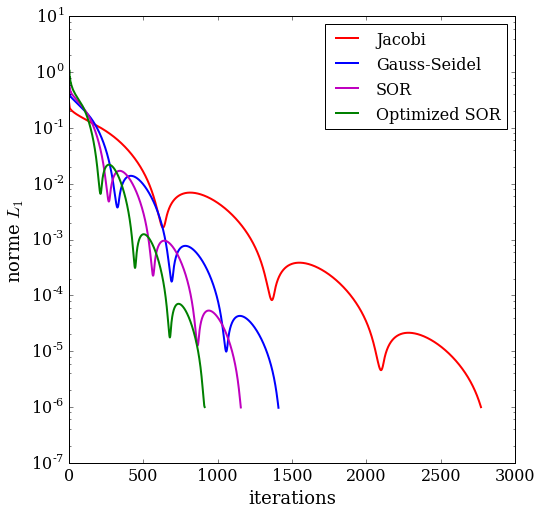

In [37]:
pyplot.figure(figsize=(8,8))
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'norme $L_1$', fontsize=18)
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiJ,'b'),
                'r-', lw=2, label='Jacobi')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiGS,'b'), 
                'b-', lw=2, label='Gauss-Seidel')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiSOR,'b'), 
                'm-', lw=2, label='SOR')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiTSOR,'b'), 
                'g-', lw=2, label='Optimized SOR')
pyplot.legend(fontsize=16);

---

##### 5. Etude de la convergence des méthodes.
---

#### 5.1 Etude de la convergence.

---

In [38]:
from matplotlib import animation
from IPython.display import HTML

In [39]:
psi, om, iterations, l1_conv= jacobi(om0.copy(), psi0.copy(), d, l1_target)

print("La méthode de Jacobi prend {} itérations à la tolérance {}".format(iterations, l1_target))

La méthode de Jacobi prend 2771 itérations à la tolérance 1e-06


In [40]:
print("")
for i in range(2771):
    if i>1 and l1_conv[i]<l1_conv[i+1]:
        print("→ L'itération recherchée est l'itération", i,"et correspond à une valeur de la norme L1 de", l1_conv[i])
        break   


→ L'itération recherchée est l'itération 633 et correspond à une valeur de la norme L1 de 0.00164224726317


In [41]:
l1_target =0.00164224726317
psi, om, iterations, l1_conv= jacobi(om0.copy(), psi0.copy(), d, l1_target)

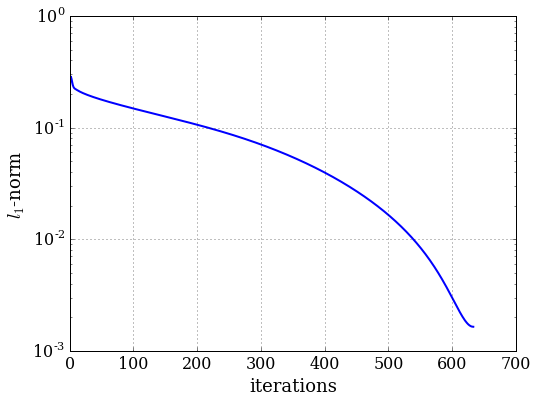

In [42]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$l_1$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(l1_conv)), l1_conv, lw=2, color='b');

In [43]:
def jacobi_anim(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    psi_ite = numpy.empty(2771,dtype=numpy.ndarray)
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Sauvegarde la valeur de psi
        psi_ite[iterations] = psi.copy()
        
        
        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi

    return psi_ite

In [44]:
l1_target =1e-6
p = jacobi_anim(om0.copy(), psi0.copy(), d, l1_target)

In [45]:
p.shape

(2771,)

In [46]:
# Sélectionne et copie un tableau tout les 10 pas 

p_ite = numpy.empty(278,dtype=numpy.ndarray)

for i in range (2771):
    if i in numpy.arange(0,2771,10):
        p_ite[int(i/10)] = p[i].copy()

In [47]:
print(int(2771/10))

277


In [48]:
fig = pyplot.figure(figsize=(8,7));
pyplot.title("système 633itérations", fontsize = 18)
ims = []


for i in range(277):
    im = pyplot.imshow(p_ite[i], cmap= cm.viridis, animated=True)
    ims.append([im])

pyplot.close()    
anim = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
HTML(anim.to_html5_video())

tentative de "reperage" d'une cellule

In [49]:
def jacobi_anim(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    psi_ite = numpy.empty(2771,dtype=numpy.ndarray)
    psi_evol=[]
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Sauvegarde la valeur de psi
        psi_ite[iterations] = psi.copy()
        psi_evol.append(psi[30,30])
        
        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi

    return psi_ite, psi_evol

In [50]:
l1_target =1e-6
p, pevol = jacobi_anim(om0.copy(), psi0.copy(), d, l1_target)

In [51]:
len(pevol)

2771

In [52]:
xsi = numpy.linspace(0,2771,len(pevol))

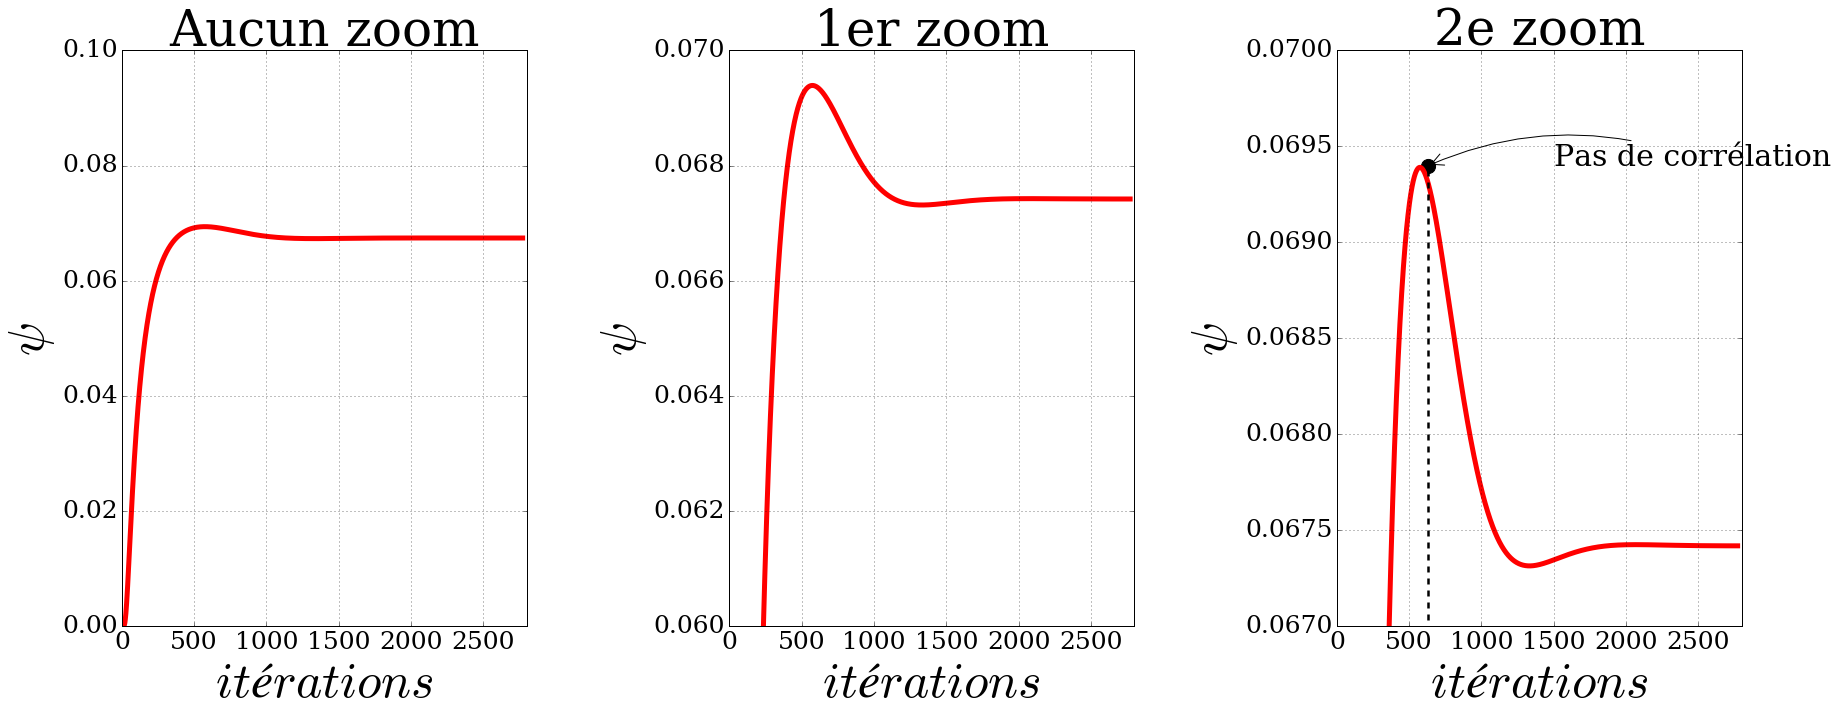

In [53]:
fig = pyplot.figure()
fig = pyplot.figure(figsize = (25, 20))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.grid(True)
pyplot.title("Aucun zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=50)
pyplot.xlabel("$itérations$", fontsize=50)
line, = ax.plot(xsi, numpy.abs(pevol), 'r-', lw=5)
ax.set_ylim(0,0.1)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=25)


# Graphique 2
ax = fig.add_subplot(132)
pyplot.grid(True)
pyplot.title("1er zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=50)
pyplot.xlabel("$itérations$", fontsize=50)
line, = ax.plot(xsi, numpy.abs(pevol), 'r-', lw=5)
ax.set_ylim(0.060,0.070)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=25)


# Graphique 3
ax = fig.add_subplot(133)
pyplot.grid(True)
pyplot.title("2e zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=50)
pyplot.xlabel("$itérations$", fontsize=50)
line, = ax.plot(xsi, numpy.abs(pevol), 'r-', lw=5)
#réglage des pointillés reliant l'axe
pyplot.plot([633,633],[0,0.06940], color ='k', linewidth=2.5, linestyle="--")
#réglage du point
pyplot.scatter([633,],[0.06940,], 200, color ='k')
#réglage flèche et texte
ax.annotate("Pas de corrélation", xy=(633,0.06940), xytext=(1500, 0.06940),
            fontsize=30, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=.2"),)
ax.set_ylim(0.067,0.070)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=25)


pyplot.show()

##### Etape 2

In [54]:
def jacobi_anim(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    l1_conv30=[]
    psi_ite = numpy.empty(2771,dtype=numpy.ndarray)
    psi_evol=[]
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Sauvegarde la valeur de psi
        psi_ite[iterations] = psi.copy()
        psi_evol.append(psi[30,30])
        
        
        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_psi30 = L1norm(psi[30,30],psin[30,30])      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi
        l1_conv30.append(norme_psi30)     # Sauvegarde de la norme pour psi

    return psi_ite, psi_evol, l1_conv30

In [55]:
l1_target =1e-6
p, pevol, l1_conv30 = jacobi_anim(om0.copy(), psi0.copy(), d, l1_target)

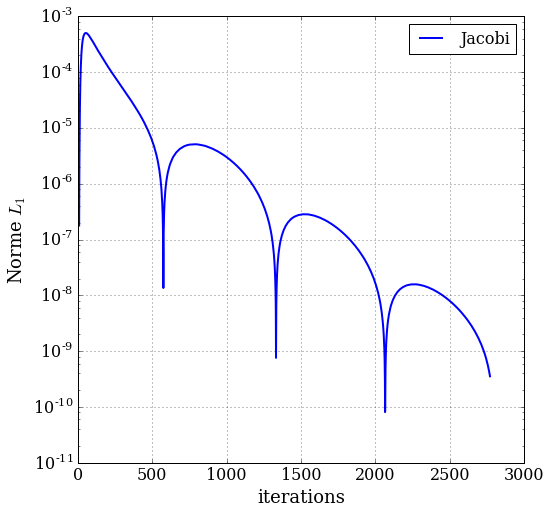

In [56]:
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'Norme $L_1$', fontsize=18)
pyplot.semilogy(numpy.trim_zeros(l1_conv30,'b'),
                'b-', lw=2, label='Jacobi')

pyplot.legend(fontsize=16);

In [57]:
mini=[]
mini_ite=[]

for i in range(2770):
    if l1_conv30[i]<l1_conv30[i+1]\
    and l1_conv30[i]<l1_conv30[i+2]\
    and l1_conv30[i]<l1_conv30[i-1]\
    and l1_conv30[i]<l1_conv30[i-2]:        
        mini.append(l1_conv30[i])
        mini_ite.append(i) 
        
for i in range (3):
    if i<1 :
        print("→ La valeur du", i+1,"er minimum est", mini[i],"et intervient \n à l'itération :", mini_ite[i],"\n")
    else:
        print("→ La valeur du", i+1,"ème minimum est", mini[i],"et intervient \n à l'itération :", mini_ite[i],"\n")

→ La valeur du 1 er minimum est 1.35825457687e-08 et intervient 
 à l'itération : 575 

→ La valeur du 2 ème minimum est 7.5941308797e-10 et intervient 
 à l'itération : 1332 

→ La valeur du 3 ème minimum est 8.1143120001e-11 et intervient 
 à l'itération : 2065 



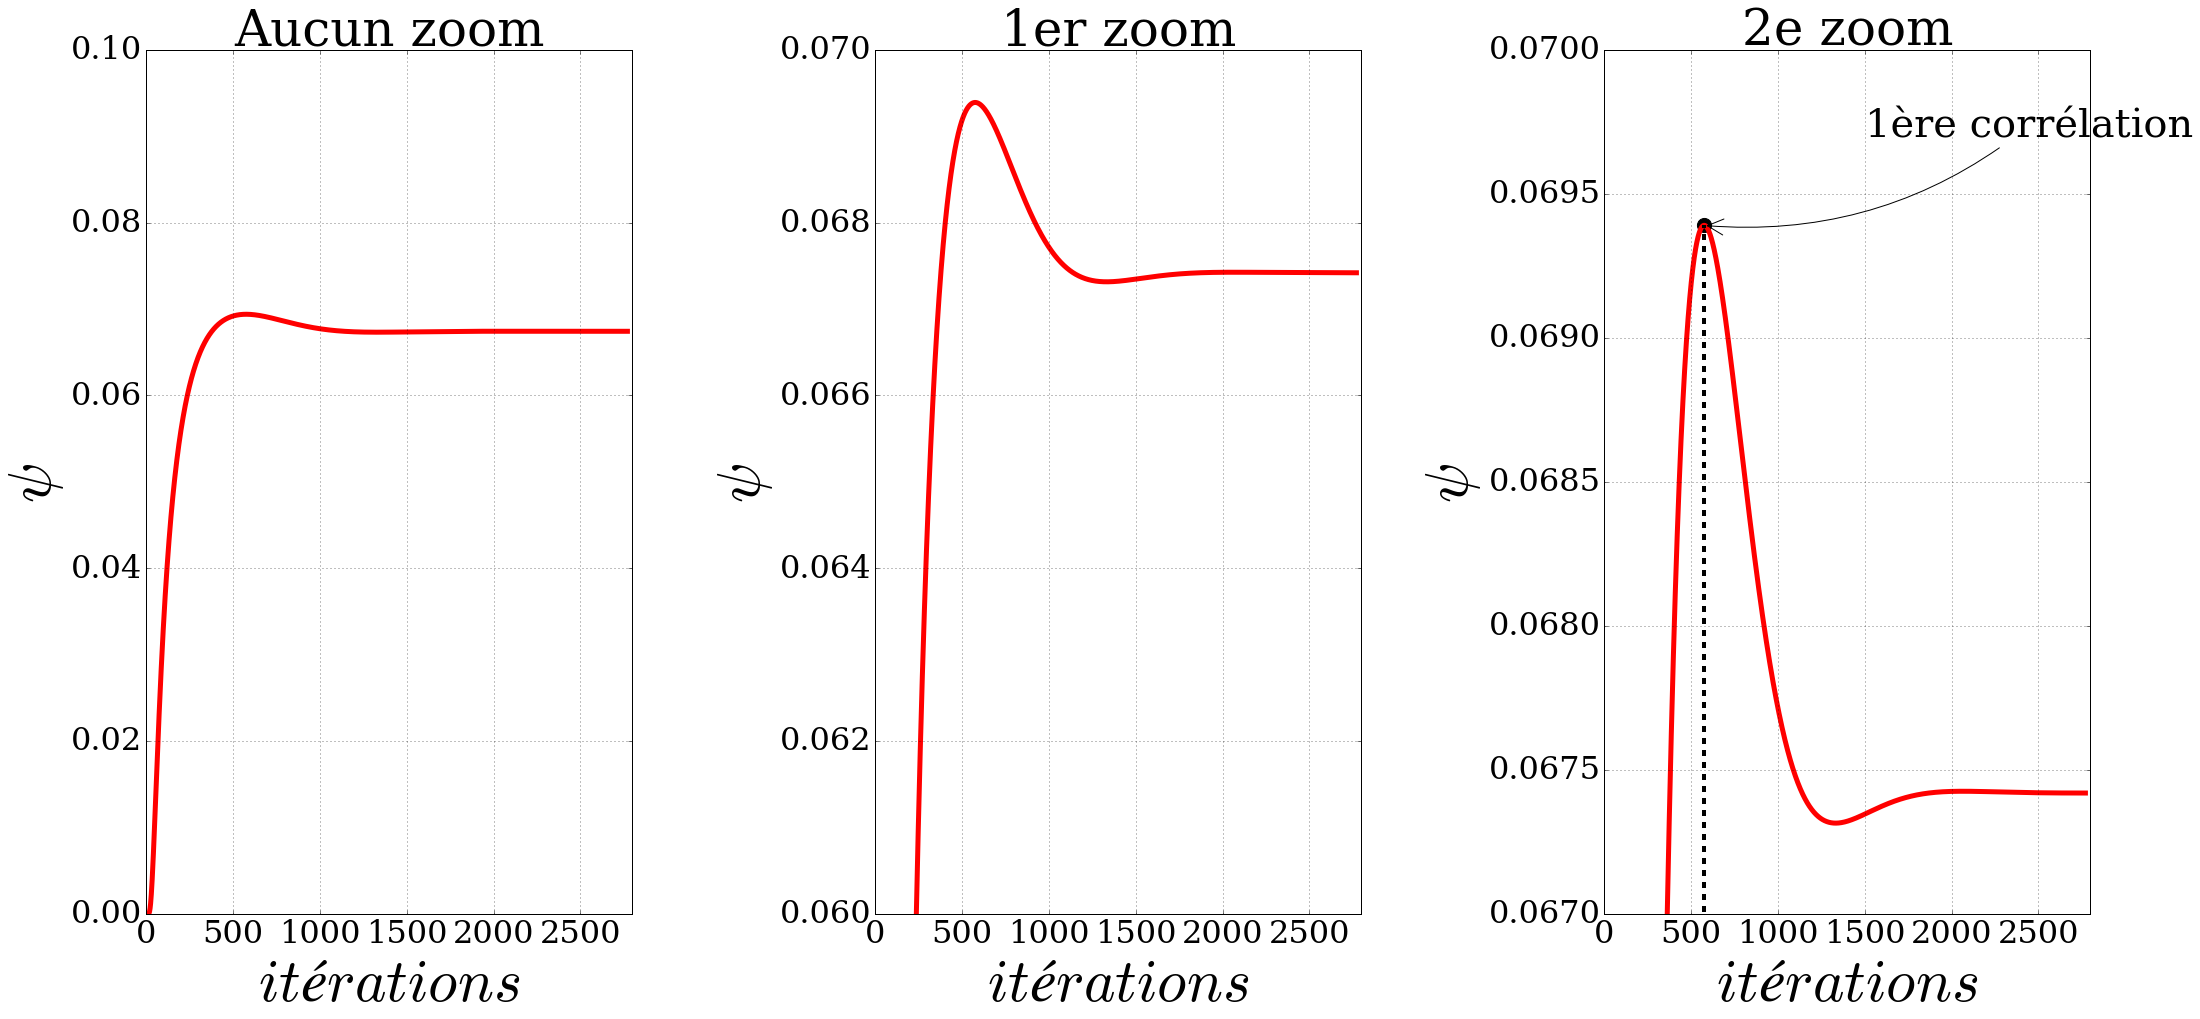

In [58]:
fig = pyplot.figure()
fig = pyplot.figure(figsize = (30, 30))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.grid(True)
pyplot.title("Aucun zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=60)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(pevol), 'r-', lw=5)
ax.set_ylim(0,0.1)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


#Graphique 2
ax = fig.add_subplot(132)
pyplot.grid(True)
pyplot.title("1er zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=60)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(pevol), 'r-', lw=5)
ax.set_ylim(0.060,0.070)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


#Graphique 3
ax = fig.add_subplot(133)
pyplot.grid(True)
pyplot.title("2e zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=60)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(pevol), 'r-', lw=5)
#réglage pointiller reliant l'axe
pyplot.plot([mini_ite[0],mini_ite[0]],[0,0.06939], color ='k', linewidth=4, linestyle="--")
#réglage point
pyplot.scatter([mini_ite[0],],[0.06939,], 200, color ='k')
#réglage flèche et texte
ax.annotate("1ère corrélation", xy=(mini_ite[0],0.06939), xytext=(1500, 0.06970),
            fontsize=40, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-.2"),)
ax.set_ylim(0.067,0.070)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


pyplot.show()

Cherchons la seconde corrélation

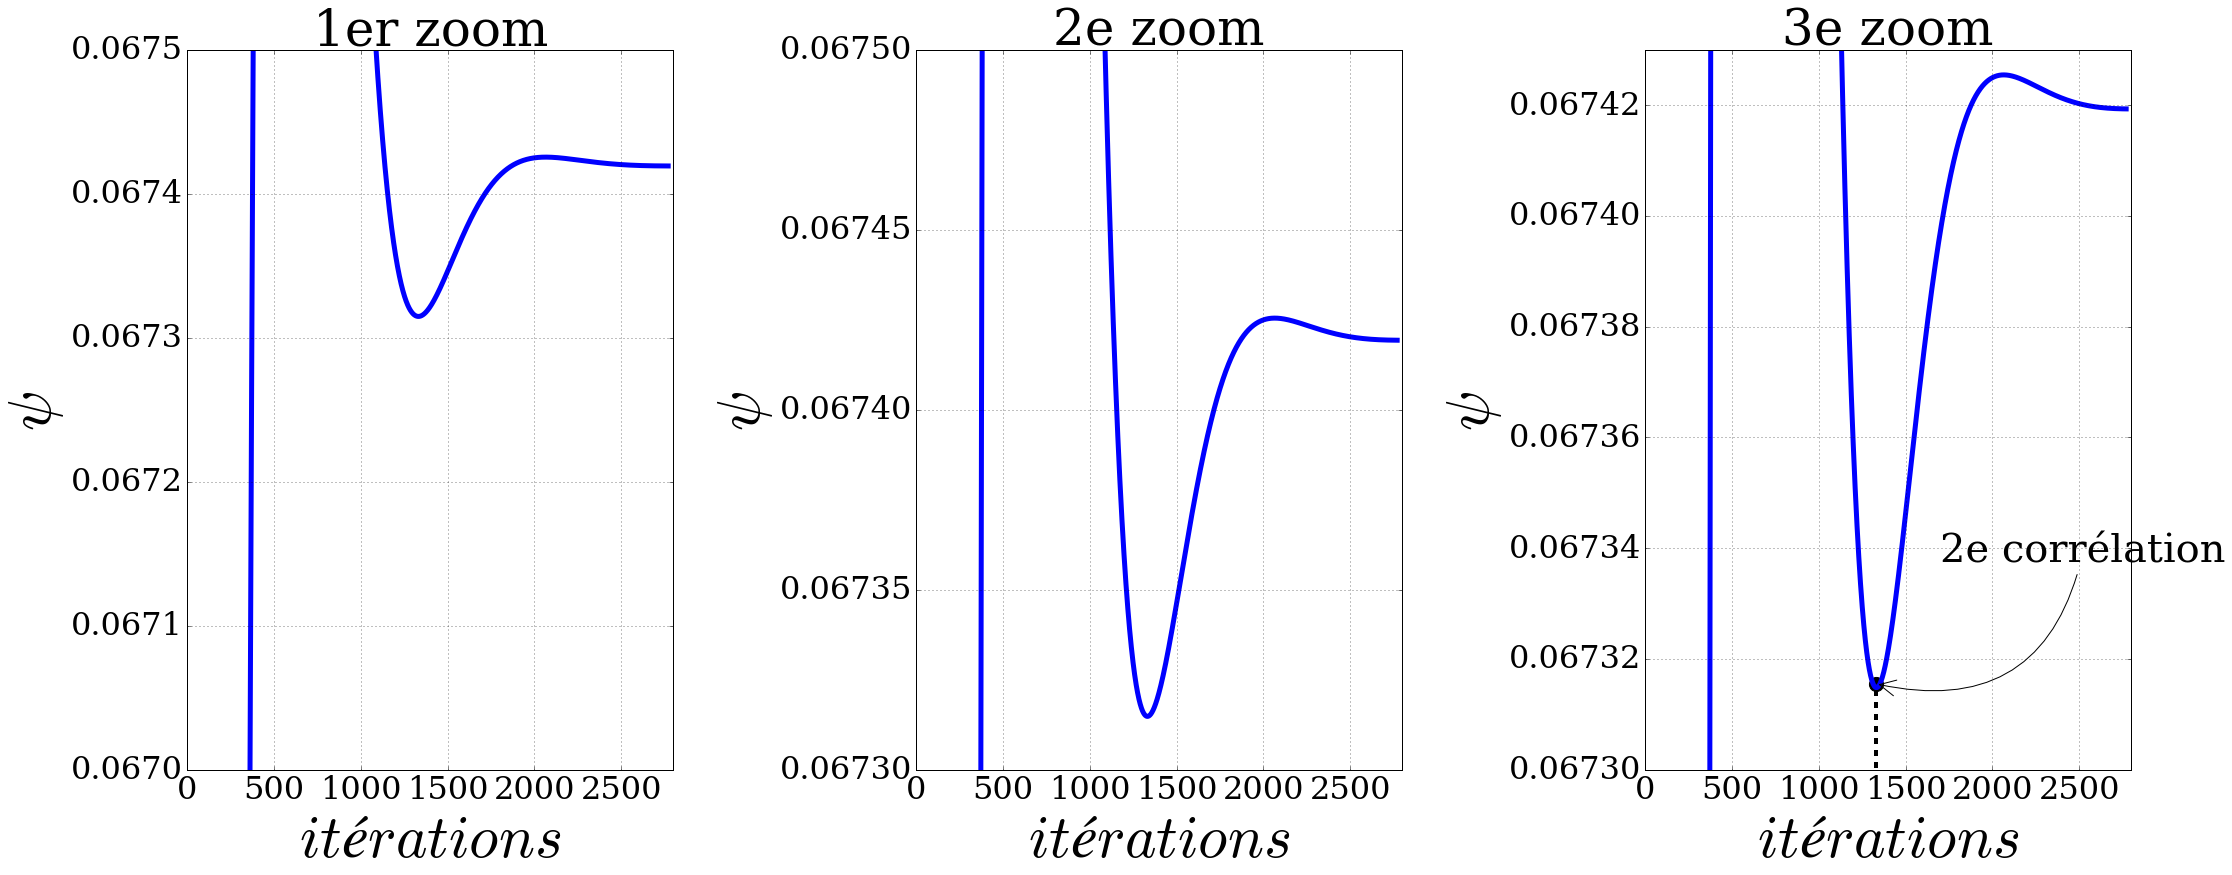

In [59]:
fig = pyplot.figure()
fig = pyplot.figure(figsize = (30, 25))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.grid(True)
pyplot.title("1er zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=60)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(pevol), 'b-', lw=5)
ax.set_ylim(0.0670,0.0675)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 2
ax = fig.add_subplot(132)
pyplot.grid(True)
pyplot.title("2e zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=60)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(pevol), 'b-', lw=5)
ax.set_ylim(0.0673,0.0675)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 3
ax = fig.add_subplot(133)
pyplot.grid(True)
pyplot.title("3e zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=60)
pyplot.xlabel("$itérations$", fontsize=60)
line, = ax.plot(xsi, numpy.abs(pevol), 'b-', lw=5)
#réglage pointiller reliant l'axe
pyplot.plot([mini_ite[1],mini_ite[1]],[0,0.0673155], color ='k', linewidth=4, linestyle="--")
#réglage point
pyplot.scatter([mini_ite[1],],[0.0673155,], 200, color ='k')
#réglage flèche et texte
ax.annotate("2e corrélation", xy=(mini_ite[1],0.0673155), xytext=(1700, 0.0673375),
            fontsize=40, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-.5"),)
ax.set_ylim(0.06730,0.06743)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


pyplot.show()

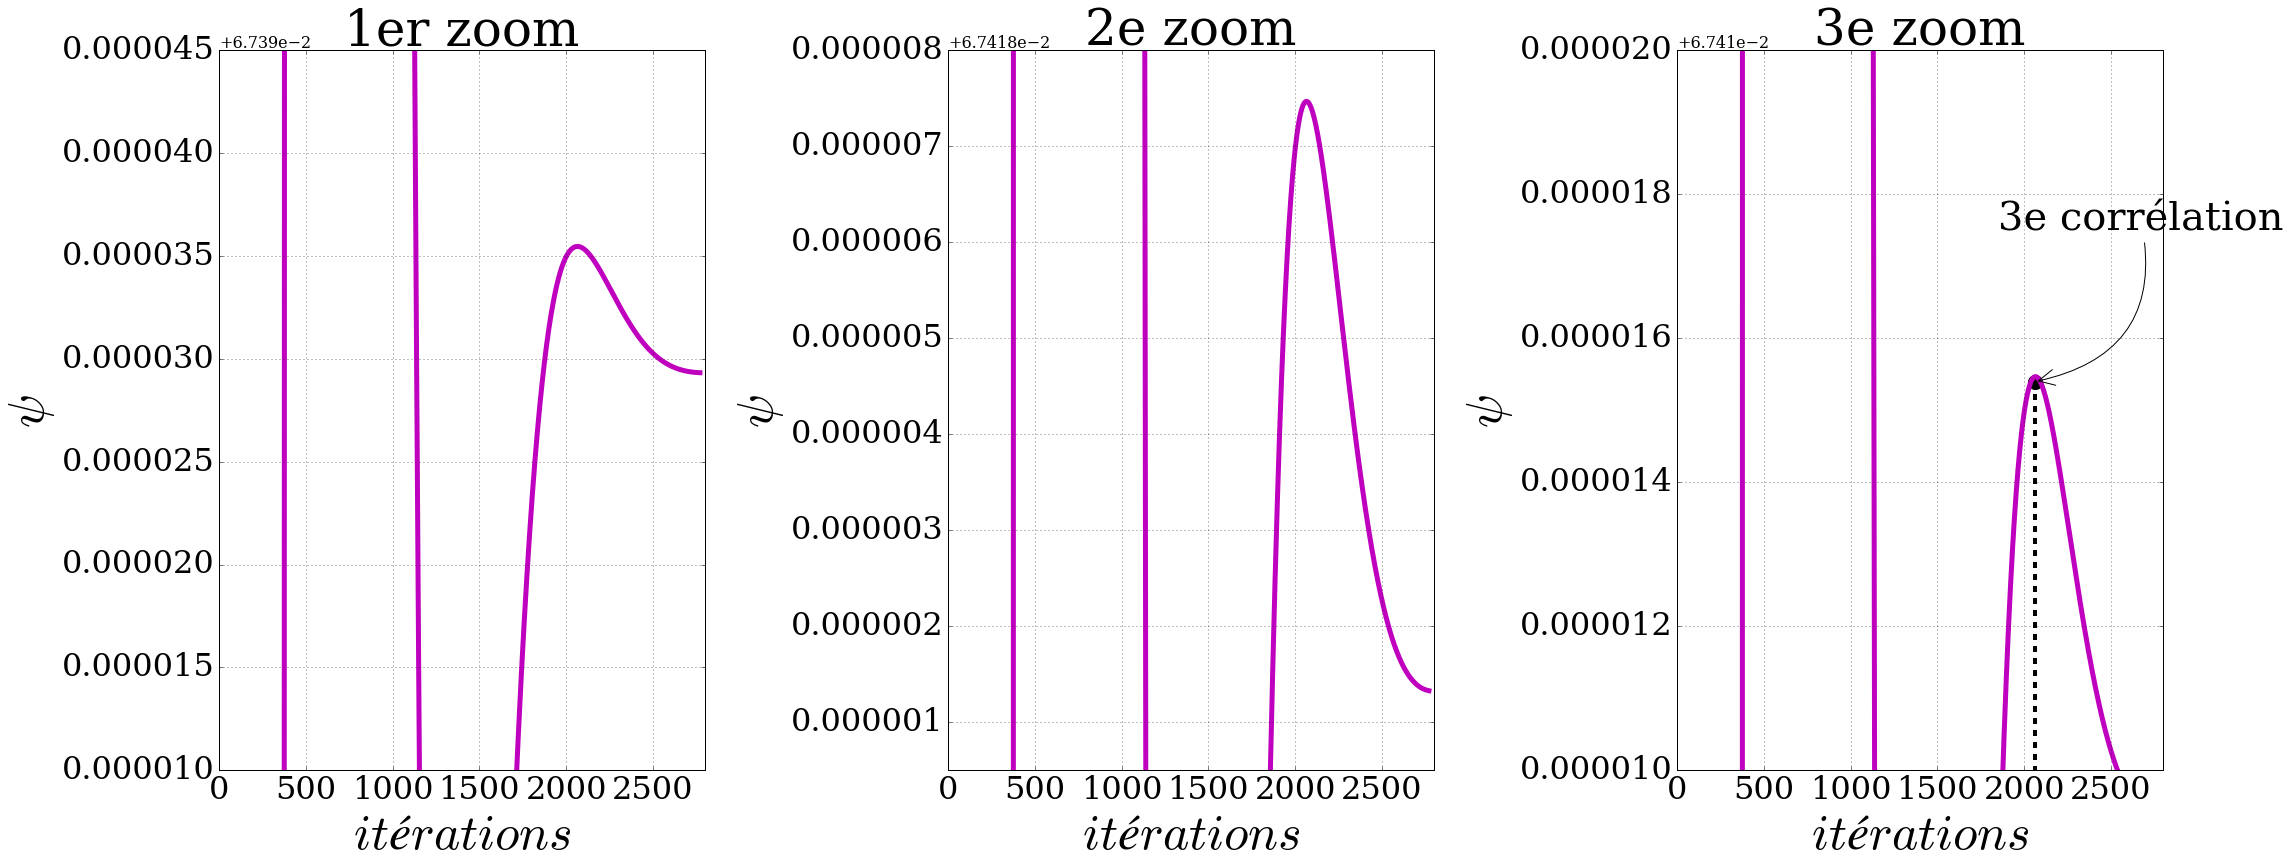

In [60]:
fig = pyplot.figure()
fig = pyplot.figure(figsize = (30, 25))
fig.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5) 

# Graphique 1
ax = fig.add_subplot(131)
pyplot.grid(True)
pyplot.title("1er zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=50)
pyplot.xlabel("$itérations$", fontsize=50)
line, = ax.plot(xsi, numpy.abs(pevol), 'm-', lw=5)
ax.set_ylim(0.06740,0.067435)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 2
ax = fig.add_subplot(132)
pyplot.grid(True)
pyplot.title("2e zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=50)
pyplot.xlabel("$itérations$", fontsize=50)
line, = ax.plot(xsi, numpy.abs(pevol), 'm-', lw=5)
ax.set_ylim(0.0674185,0.0674260)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


# Graphique 3
ax = fig.add_subplot(133)
pyplot.grid(True)
pyplot.title("3e zoom", fontsize = 50)
pyplot.ylabel('$\psi$', fontsize=50)
pyplot.xlabel("$itérations$", fontsize=50)
line, = ax.plot(xsi, numpy.abs(pevol), 'm-', lw=5)
#réglage pointiller reliant l'axe
pyplot.plot([mini_ite[2],mini_ite[2]],[0,0.0674254], color ='k', linewidth=4, linestyle="--")
#réglage point
pyplot.scatter([mini_ite[2],],[0.0674254,], 200, color ='k')
#réglage flèche et texte
ax.annotate("3e corrélation", xy=(mini_ite[2],0.0674254), xytext=(1850, 0.0674275),
            fontsize=40, arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3,rad=-.5"),)
ax.set_ylim(0.0674200,0.0674300)
ax.set_xlim(0,2800)
pyplot.tick_params(axis='both', labelsize=32)


pyplot.show()

##### Bonus 2

In [90]:
@jit(nopython=True)
def CBH(psi, om):

    for i in range(1,nx-1):
        om[-1,i] = (-0.5/(d**2))*(8*psi[-2,i]-psi[-3,i])+ ((7*psi[-1,i])/(2*d**2))              # Bord supérieur
        om[0,i] = (-0.5/(d**2))*(8*psi[1,i]-psi[2,i])# Bord inférieur

    for j in range(1,ny-1):
        om[j,-1] = (-0.5/(d**2))*(8*psi[j,-2]-psi[j,-3])+ ((3*l)/d) +((7*psi[j,-1])/(2*d**2))   # Bord droit     
        om[j,0] = (-0.5/(d**2))*(8*psi[j,1]-psi[j,2])+ ((3*l)/d) + ((7*psi[j,0])/(2*d**2))  # Bord gauche

    return om

In [91]:
#Initialisation des paramètres initiaux
nx = 41            # Nombre de point discrétisant l'axe x
ny = 41            # Nombre de point discrétisant l'axe y
l = 1.             # Limite en x de notre domaine (cavité)
h = 1.             # Limite en y de notre domaine (cavité)
d = l/(nx-1)       # delta
l1_target = 1e-6   # Critère d'arrêt

# Conditions initiales
psi0 = numpy.zeros((ny,nx))
om0  = numpy.zeros((ny,nx))

# Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

for i in range (nx):
    psi0[i,0] = y[i]*l     # Bord gauche
    psi0[i,-1] = y[i]*l    # Bord droit
    psi0[0,i] = 0          # Bord inférieur
    psi0[-1,i] = l         # Bord supérieur

CBH(psi0, om0)

array([[    0.,    -0.,    -0., ...,    -0.,    -0.,     0.],
       [  260.,     0.,     0., ...,     0.,     0.,   260.],
       [  400.,     0.,     0., ...,     0.,     0.,   400.],
       ..., 
       [ 5440.,     0.,     0., ...,     0.,     0.,  5440.],
       [ 5580.,     0.,     0., ...,     0.,     0.,  5580.],
       [    0.,  5600.,  5600., ...,  5600.,  5600.,     0.]])

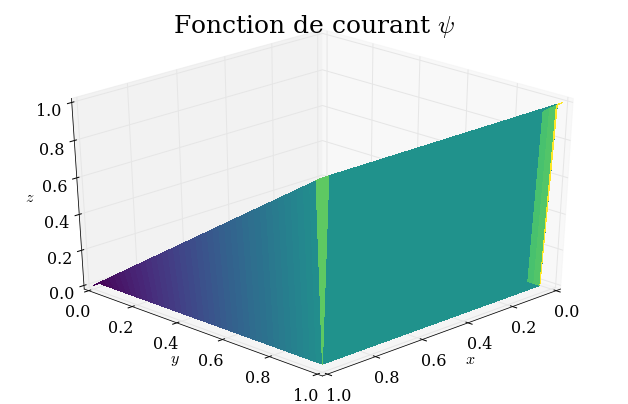

In [92]:
plot_3D(x,y,psi0)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)

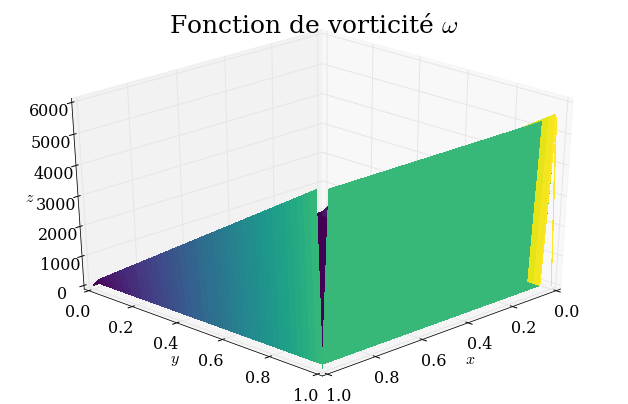

In [93]:
plot_3D(x,y,om0)
pyplot.title("Fonction de vorticité $\omega$", fontsize = 25)

In [94]:
print(y[20])
print(x[15])

0.5
0.375


In [95]:
@jit(nopython=True)
def jacobi_compil(om, omn, psi, psin, d, l1_target):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''


    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1 #init iter_diff to be larger than l1_target
    iter_diff_om = l1_target+1 #init iter_diff to be larger than l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(5000)
    l1_diff_om = numpy.zeros(5000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (omn[j,i-1] + omn[j,i+1]\
                              + omn[j-1,i]  + omn[j+1,i])
                
        # On impose les conditions aux bords
        CBH(psi, om)   
            
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psin[j,i-1] + psin[j,i+1]\
                                + psin[j-1,i]  + psin[j+1,i] + om[j,i] * d**2)
            
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

In [96]:
psih, om, iterations, l1_diff_psiJh = jacobi_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target)

print("La méthode de Jacobi compilée prend {} itérations à la tolérance {}".format(iterations, l1_target))

La méthode de Jacobi compilée prend 3310 itérations à la tolérance 1e-06


In [97]:
print(psih[-1,:])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


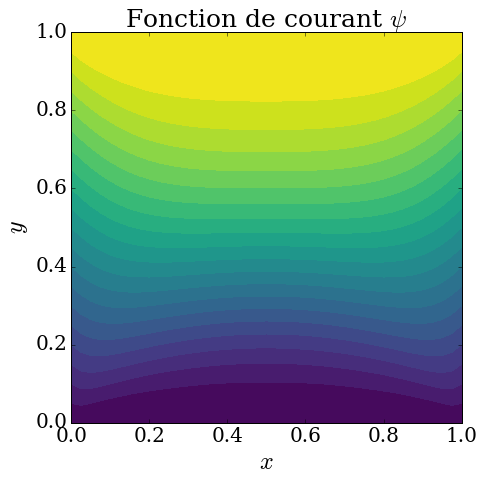

In [109]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psih,20,cmap=cm.viridis)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)
pyplot.xlabel('$x$', fontsize=24)
pyplot.ylabel('$y$', fontsize=24)
pyplot.tick_params(axis='both',labelsize=20)

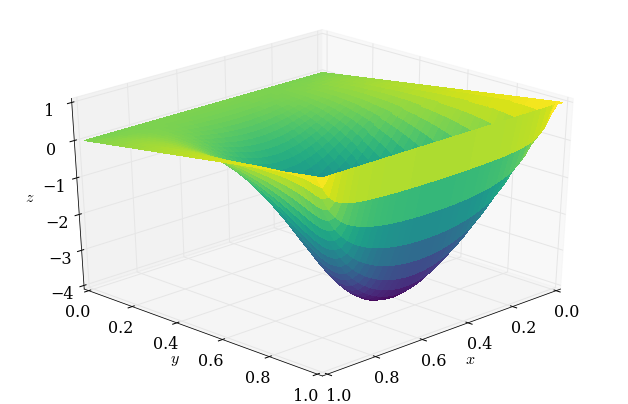

In [70]:
plot_3D(x,y,psih)

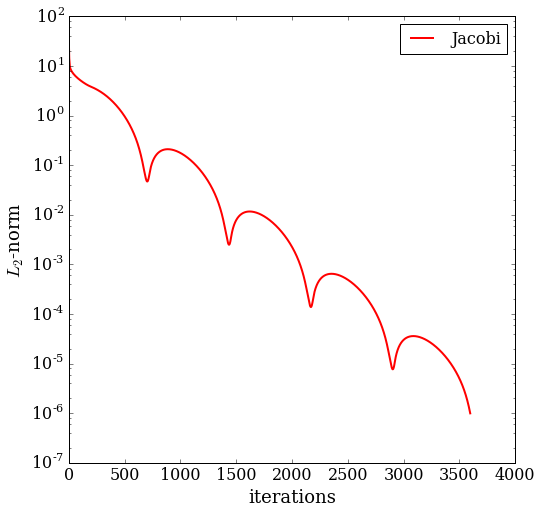

In [71]:
pyplot.figure(figsize=(8,8))
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_2$-norm', fontsize=18)
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiJh,'b'),
                'r-', lw=2, label='Jacobi')
pyplot.legend(fontsize=16);

In [74]:
def jacobi_anim(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    # Initialisation des variables et tableaux utiles
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)     
    psin = numpy.empty_like(psi)   
    iterations = 0
    l1_conv=[]
    psih_ite = numpy.empty(3598,dtype=numpy.ndarray)
    
    #On lance notre boucle while avec le critère d'arrêt double pour "l1_target"
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        # Calcul des nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        CBH(psi, om)
        
        # Calcul des nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psin[1:-1,2:] + psin[1:-1,:-2]\
                              + psin[2:,1:-1] + psin[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Sauvegarde la valeur de psi
        psih_ite[iterations] = psi.copy()
        
        
        #Calcul des normes et sauvegarde de la norme pour psi
        norme_psi = L1norm(psi,psin)      # Calcul de la norme pour psi
        norme_om  = L1norm(om,omn)        # Calcul de la norme pour omega
        iterations += 1                   # l'itération est élevé d'une unité
        l1_conv.append(norme_psi)         # Sauvegarde de la norme pour psi

    return psih_ite

In [75]:
l1_target =1e-6
ph = jacobi_anim(om0.copy(), psi0.copy(), d, l1_target)

In [76]:
ph.shape

(3598,)

In [77]:
print(int(len(ph)/10))

359


In [78]:
# Sélectionne et copie un tableau tout les 100 pas 

ph_ite = numpy.empty(360,dtype=numpy.ndarray)

for i in range (3598):
    if i in numpy.arange(0,3598,10):
        ph_ite[int(i/10)] = ph[i].copy()

In [79]:
ph_ite.shape
print(ph_ite)

[ array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.025     ,  0.01640625,  0.        , ...,  0.        ,
         0.01640625,  0.025     ],
       [ 0.05      ,  0.028125  ,  0.        , ...,  0.        ,
         0.028125  ,  0.05      ],
       ..., 
       [ 0.95      ,  0.45      ,  0.        , ...,  0.        ,
         0.45      ,  0.95      ],
       [ 0.975     ,  0.71171875,  0.25      , ...,  0.25      ,
         0.71171875,  0.975     ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.025     ,  0.02582934,  0.01928102, ...,  0.01928102,
         0.02582934,  0.025     ],
       [ 0.05      ,  0.05849364,  0.05100707, ...,  0.05100707,
         0.05849364,  0.05      ],
       ..., 
       [ 0.95      ,  0.72037298,  0.43338078, ...,  0.43338078,
     

In [80]:
fig = pyplot.figure(figsize=(8,7));
pyplot.title("système 633itérations", fontsize = 18)
ims = []


for i in range(360):
    im = pyplot.imshow(ph_ite[i], cmap= cm.viridis, animated=True)
    ims.append([im])

pyplot.close()    
anim = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
HTML(anim.to_html5_video())

In [ ]:
for i in range (nx):
    psi0[i,0] = y[i]*l     # Bord gauche
    psi0[i,-1] = y[i]*l    # Bord droit
    psi0[0,i] = 1          # Bord inférieur
    psi0[-1,i] = 1         # Bord supérieur

In [ ]:
@jit(nopython=True)   
def CB(psi, om):

    for i in range(1,nx-1):
        om[-1,i] = -0.5/(d**2)*(8*psi[-2,i]-psi[-3,i])-(3/d) # Bord supérieur
        om[0,i] = -0.5/(d**2)*(8*psi[1,i]-psi[2,i])          # Bord inférieur

    for j in range(1,ny-1):
        om[j,-1] = -0.5/(d**2)*(8*psi[j,-2]-psi[j,-3])       # Bord droit
        om[j,0] = -0.5/(d**2)*(8*psi[j,1]-psi[j,2])          # Bord gauche

    return om

In [ ]:
@jit
def methode_compil(om, omn, psi, psin, d, l1_target, k, omega):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psin: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''


    omn = numpy.empty_like(om)
    psin = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1 #init iter_diff to be larger than l1_target
    iter_diff_om = l1_target+1 #init iter_diff to be larger than l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)

    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psin = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psin[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        if k==1:
            # On calcul nos nouvelles valeurs de omega
            for j in range(1,ny-1):
                for i in range(1,nx-1):
                    om[j,i] = 0.25 * (omn[j,i-1] + omn[j,i+1]\
                              + omn[j-1,i]  + omn[j+1,i])
            # On impose les conditions aux bords
            CB(psi, om)                 
            # On calcul nos nouvelles valeurs de psi
            for j in range(1,ny-1):
                for i in range(1,nx-1):
                    psi[j,i] = 0.25 * (psin[j,i-1] + psin[j,i+1]\
                                + psin[j-1,i]  + psin[j+1,i] + om[j,i] * d**2)
        
        elif k==2:
            # On calcul nos nouvelles valeurs de omega
            for j in range(1,ny-1):
                for i in range(1,nx-1):
                    om[j,i] = 0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])  
            # On impose les conditions aux bords
            CB(psi, om) 
            # On calcul nos nouvelles valeurs de psi
            for j in range(1,ny-1):
                for i in range(1,nx-1):
                    psi[j,i] = 0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)
                    
        elif k==3:
            # On calcul nos nouvelles valeurs de omega
            for j in range(1,ny-1):
                for i in range(1,nx-1):
                    om[j,i] = (1-omega)*om[j,i] + omega*0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])
            # On impose les conditions aux bords
            CB(psi, om) 
            # On calcul nos nouvelles valeurs de psi
            for j in range(1,ny-1):
                for i in range(1,nx-1):
                    psi[j,i] = (1-omega)*psi[j,i] + omega*0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)
        
        else:            
            print("Aucune méthode ne correspond à cette valeur de k")
            break    
        
        # Calcul des normes et sauvegarde de la norme pour psi  
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psin[j,i])  # Calcul de la norme pour psi
                iter_diff_om += abs(om[j,i] - omn[j,i])     # Calcul de la norme pour omega
        
        l1_diff_psi[iterations] = iter_diff_psi    # Sauvegarde de la norme pour psi
        iterations += 1                            # L'itération est élevé d'une unité
 
    return psi, om, iterations, l1_diff_psi

In [ ]:
#k=2
#omega=1.218

#psi, om, iterations, l1_diff_psi = methode_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, k, omega)
#print("\n → La méthode de Jacobi compilée prend {} itérations à la \n tolérance: {}".format(iterations, l1_target))

In [ ]:
#%%timeit
#methode_compil(om0.copy(), om0.copy(), psi0.copy(), psi0.copy(), d, l1_target, k, omega)

---

##### 7. Sources.
---

[1] Cours de physique générale III (PHYS-F-201), " deuxième partie : milieux continus ", présenté par M. Nicolas CHAMEL (2014-2015) 

[2] Méthode SPH : http://onlinelibrary.wiley.com/doi/10.1002/fld.4196/full

[3]https://epiportal.com/Ebooks/Numerical%20Methods%20for%20Engineers%20and%20Scientists.pdf

---
###### La cellule ci-dessous charge le style du notebook.

In [106]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())